In [520]:
# first, give colab access to your drive
from google.colab import drive
drive_path = '/content/drive'
drive.mount(drive_path, force_remount=True)

Mounted at /content/drive


In [521]:
# define path of folder in drive 

folder_path = drive_path+'/My Drive/Final assignment /'

In [522]:
# install nedded libraries
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [523]:
# import needed libraries 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [524]:
# load functional connectivity matrix 
mat = np.load(folder_path+'functional_mat.npy')
labels = np.load(folder_path+'func_labels.npy')

In [525]:
# create a graph object 
graph = nx.from_numpy_matrix(mat)

In [526]:
# remove self loops 
graph.remove_edges_from(nx.selfloop_edges(graph))

In [527]:
print(nx.is_directed(graph))
print(nx.is_weighted(graph))



False
True


# 1. Node degree

In [528]:
# camputing the node degree
nodes_degree=list(graph.degree)


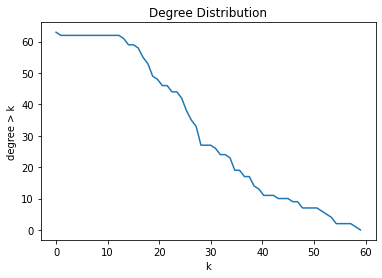

In [529]:
# plot degree distribution 
degrees = [x[1] for x in nodes_degree]

counts, bins_edges = np.histogram(degrees, bins=63)
cumsum_counts = np.cumsum(counts[::-1])
cumsum_counts = np.append(cumsum_counts[::-1], 0)

plt.plot(bins_edges, cumsum_counts)
plt.xlabel('k')
plt.ylabel('degree > k')
plt.title('Degree Distribution')
plt.show()

# 2. Centrality Measure

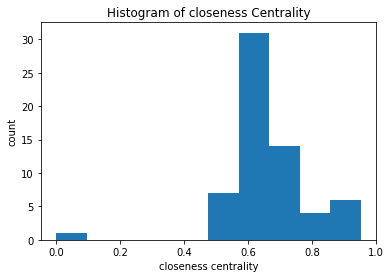

In [530]:
# compute closeness centrality 
cc = nx.closeness_centrality(graph)

cc_values=cc.values()
plt.hist(cc_values)
plt.xlabel('closeness centrality')
plt.ylabel('count')
plt.title('Histogram of closeness Centrality')
plt.show()

# 3. Rich Club

In [531]:
# calculate rich club coefficient

rc = nx.rich_club_coefficient(graph)

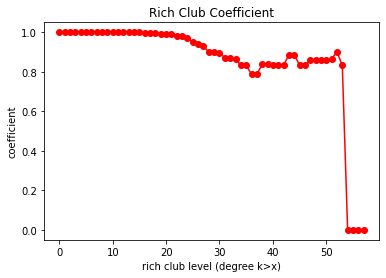

In [532]:
# plot

degrees=rc.keys()
coeffs=rc.values()

plt.plot(list(degrees), list(coeffs), '-or')
plt.xlabel('rich club level (degree k>x)')
plt.ylabel('coefficient')
plt.title('Rich Club Coefficient')
plt.show()

# 4. Segregatin vs integration

In [533]:
# segregation 
clustering_coeffs=nx.clustering(graph)
clustering_coeffs=list(clustering_coeffs.values())

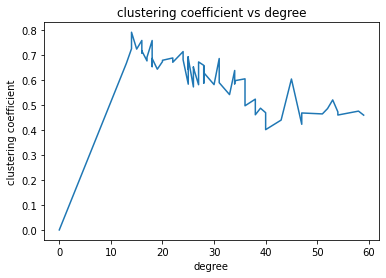

In [534]:
# plot clustering coefficient vs degree 

degrees_list=nx.degree(graph)
degrees_list= list(degrees_list)
degrees=[x[1] for x in degrees_list]

indices=np.argsort(degrees)
clustering_new_coeffs=[clustering_coeffs[i] for i in indices]

plt.plot(np.sort(degrees), clustering_new_coeffs)
plt.xlabel('degree')
plt.ylabel('clustering coefficient')
plt.title('clustering coefficient vs degree')
plt.show()


In [535]:
np.mean(clustering_new_coeffs)

0.5950960055433995

In [536]:
# integration 
shortest_paths=dict(nx.shortest_path_length(graph))

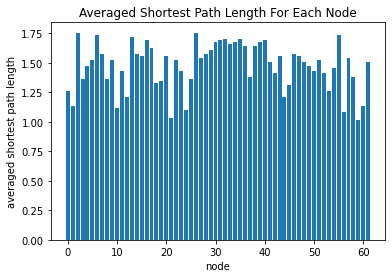

In [537]:
# plotting average shortest path for each node, according to degrees

av_paths=[]
# looping over number of nodes
for n in range(0,len(degrees)-1): 
  shortest=shortest_paths[n]
  path_vals=list(shortest.values())
  path_vals.pop(n)
  av_paths.append(np.mean(path_vals))


# plotting
plt.bar(range(0,len(degrees)-1), av_paths)
plt.xlabel('node')
plt.ylabel('averaged shortest path length')
plt.title('Averaged Shortest Path Length For Each Node')
plt.show()

In [538]:
np.mean(av_paths)

1.4754098360655739

# 5. Removal of a Node

In [539]:
graph = nx.from_numpy_matrix(mat)

In [540]:
# finding the node with the highest centrality (based on degree) value
dc=nx.degree_centrality(graph)
dc_vals=list(dc.values())
node_max=graph.nodes[np.argmax(dc_vals)]

In [541]:
# remove node_max
graph.remove_node(59)

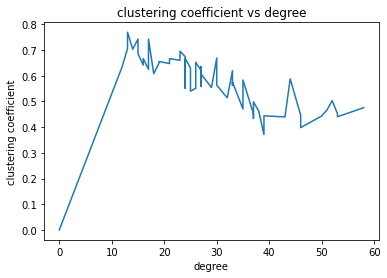

In [542]:
# segregation 
clustering_coeffs=nx.clustering(graph)
clustering_coeffs=list(clustering_coeffs.values())

# plot clustering coefficient vs degree 

degrees_list=nx.degree(graph)
degrees_list= list(degrees_list)
degrees=[x[1] for x in degrees_list]

indices=np.argsort(degrees)
clustering_new_coeffs=[clustering_coeffs[i] for i in indices]

plt.plot(np.sort(degrees), clustering_new_coeffs)
plt.xlabel('degree')
plt.ylabel('clustering coefficient')
plt.title('clustering coefficient vs degree')
plt.show()

In [543]:
np.mean(clustering_new_coeffs)

0.5746206847593764

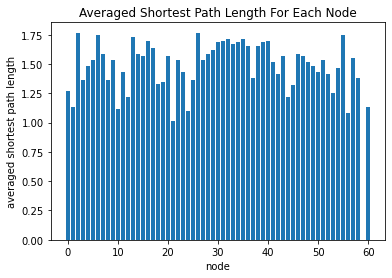

In [544]:
# integration 
shortest_paths=dict(nx.shortest_path_length(graph))

# plotting average shortest path for each node 

av_paths=[]
nodes_lst=[]
# looping over number of nodes
for n in range(0,len(degrees)-1): 
  if n!=59: 
    nodes_lst.append(n)
    shortest=shortest_paths[n]
    path_vals=list(shortest.values())
    path_vals.pop(n)
    av_paths.append(np.mean(path_vals))

# plotting

plt.bar(nodes_lst, av_paths)
plt.xlabel('node')
plt.ylabel('averaged shortest path length')
plt.title('Averaged Shortest Path Length For Each Node')
plt.show()

In [545]:
np.mean(av_paths)

1.4897222222222224